#                                YELP SENTIMENTAL ANALYSIS! 🧑🏻‍💻📚

Predict the sentiment (postive or negative) based on review text

In [1]:
# General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
import re
plt.style.use('ggplot')


# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [3]:
yelp_rev= pd.read_csv("yelp_review.csv")

In [4]:
# generate random sample for the analysis using random function
start_time= time.time()
yelp_1= yelp_rev.iloc[np.random.randint(low=0, high=yelp_rev.shape[0],size=1000)]

In [5]:
yelp_1.to_csv('yelp_1.csv', index=False)


In [6]:
yelp_2= yelp_1[["stars", "text"]]

In [7]:
# mapping the ratings
yelp_2['Sentiment_rating'] = np.where(yelp_2.stars > 3,1,0)

# Removing neutral reviews 
yelp_2 = yelp_2[yelp_2.stars != 3]

# Printing the counts of each class
yelp_2['Sentiment_rating'].value_counts()


<ipython-input-7-b148f48d4426>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_2['Sentiment_rating'] = np.where(yelp_2.stars > 3,1,0)


1    623
0    227
Name: Sentiment_rating, dtype: int64

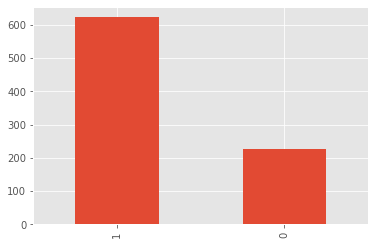

In [8]:
yelp_2.Sentiment_rating.value_counts().plot.bar()
plt.show()

In [9]:
yelp_2.head(5)

,stars,text,Sentiment_rating
5235106,5,I love the lunch specials! Great price and lot...,1
4823434,5,Shimogamo has some of the best sushi I have ev...,1
1884000,5,"The first time I needed UPS (years ago), I wen...",1
3580756,5,Good food and good service. They blast the AC ...,1
1876187,5,Same quality and service as the downtown Oshaw...,1


In [10]:
# remove punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punct(txt):
    text_nopunct= "".join([char for char in txt if char not in string.punctuation])
    return text_nopunct
yelp_2["text_nopunct"]= yelp_2["text"].apply(lambda x: remove_punct(x))

In [12]:
yelp_2.head()

,stars,text,Sentiment_rating,text_nopunct
5235106,5,I love the lunch specials! Great price and lot...,1,I love the lunch specials Great price and lots...
4823434,5,Shimogamo has some of the best sushi I have ev...,1,Shimogamo has some of the best sushi I have ev...
1884000,5,"The first time I needed UPS (years ago), I wen...",1,The first time I needed UPS years ago I went t...
3580756,5,Good food and good service. They blast the AC ...,1,Good food and good service They blast the AC i...
1876187,5,Same quality and service as the downtown Oshaw...,1,Same quality and service as the downtown Oshaw...


In [13]:
#word tokenization

In [14]:
def tokenize(txt2):
    tokens= re.split('\W+',txt2)
    return tokens

In [15]:
yelp_2["text_tok"]= yelp_2["text_nopunct"].apply(lambda x: tokenize(x))

In [16]:
yelp_2.head(5)

,stars,text,Sentiment_rating,text_nopunct,text_tok
5235106,5,I love the lunch specials! Great price and lot...,1,I love the lunch specials Great price and lots...,"[I, love, the, lunch, specials, Great, price, ..."
4823434,5,Shimogamo has some of the best sushi I have ev...,1,Shimogamo has some of the best sushi I have ev...,"[Shimogamo, has, some, of, the, best, sushi, I..."
1884000,5,"The first time I needed UPS (years ago), I wen...",1,The first time I needed UPS years ago I went t...,"[The, first, time, I, needed, UPS, years, ago,..."
3580756,5,Good food and good service. They blast the AC ...,1,Good food and good service They blast the AC i...,"[Good, food, and, good, service, They, blast, ..."
1876187,5,Same quality and service as the downtown Oshaw...,1,Same quality and service as the downtown Oshaw...,"[Same, quality, and, service, as, the, downtow..."


In [17]:
# Converting to lowercase
yelp_2['text_tok'] = yelp_2['text_nopunct'].apply(lambda x:tokenize(x.lower()))

In [18]:
yelp_2.head(5)

,stars,text,Sentiment_rating,text_nopunct,text_tok
5235106,5,I love the lunch specials! Great price and lot...,1,I love the lunch specials Great price and lots...,"[i, love, the, lunch, specials, great, price, ..."
4823434,5,Shimogamo has some of the best sushi I have ev...,1,Shimogamo has some of the best sushi I have ev...,"[shimogamo, has, some, of, the, best, sushi, i..."
1884000,5,"The first time I needed UPS (years ago), I wen...",1,The first time I needed UPS years ago I went t...,"[the, first, time, i, needed, ups, years, ago,..."
3580756,5,Good food and good service. They blast the AC ...,1,Good food and good service They blast the AC i...,"[good, food, and, good, service, they, blast, ..."
1876187,5,Same quality and service as the downtown Oshaw...,1,Same quality and service as the downtown Oshaw...,"[same, quality, and, service, as, the, downtow..."


In [19]:
# remove stopwords

In [20]:
from nltk.corpus import stopwords
stopwords= nltk.corpus.stopwords.words("english")
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [21]:
def remove_stopwords(txt3):
    text_nostop= [word for word in txt3 if word not in stopwords]
    return text_nostop

yelp_2["text_nostop"]= yelp_2["text_tok"].apply(lambda x: remove_stopwords(x))



In [22]:
yelp_2

,stars,text,Sentiment_rating,text_nopunct,text_tok,text_nostop
5235106,5,I love the lunch specials! Great price and lot...,1,I love the lunch specials Great price and lots...,"[i, love, the, lunch, specials, great, price, ...","[love, lunch, specials, great, price, lots, ch..."
4823434,5,Shimogamo has some of the best sushi I have ev...,1,Shimogamo has some of the best sushi I have ev...,"[shimogamo, has, some, of, the, best, sushi, i...","[shimogamo, best, sushi, ever, eaten, parents,..."
1884000,5,"The first time I needed UPS (years ago), I wen...",1,The first time I needed UPS years ago I went t...,"[the, first, time, i, needed, ups, years, ago,...","[first, time, needed, ups, years, ago, went, o..."
3580756,5,Good food and good service. They blast the AC ...,1,Good food and good service They blast the AC i...,"[good, food, and, good, service, they, blast, ...","[good, food, good, service, blast, ac, inside,..."
1876187,5,Same quality and service as the downtown Oshaw...,1,Same quality and service as the downtown Oshaw...,"[same, quality, and, service, as, the, downtow...","[quality, service, downtown, oshawa, location,..."
...,...,...,...,...,...,...
39247,2,I was persuaded by some local waiters in Vegas...,0,I was persuaded by some local waiters in Vegas...,"[i, was, persuaded, by, some, local, waiters, ...","[persuaded, local, waiters, vegas, try, sw, vi..."
1017191,1,On two separate occasions I have attempted to ...,0,On two separate occasions I have attempted to ...,"[on, two, separate, occasions, i, have, attemp...","[two, separate, occasions, attempted, come, es..."
411348,1,"What a cess pool. The nastiest ""hotel"" I've ev...",0,What a cess pool The nastiest hotel Ive ever b...,"[what, a, cess, pool, the, nastiest, hotel, iv...","[cess, pool, nastiest, hotel, ive, ever, pleas..."
1018259,1,Scam. Don't give them a chance to send you any...,0,Scam Dont give them a chance to send you anyth...,"[scam, dont, give, them, a, chance, to, send, ...","[scam, dont, give, chance, send, anything, bai..."


In [23]:
# Stemmer
ps= nltk.PorterStemmer()

In [24]:
def stemm_tokens(text_stem):
    stem_list= [ps.stem(word) for word in text_stem]
    return stem_list

yelp_2["text_stemmed"]= yelp_2["text_nostop"].apply(lambda x: stemm_tokens(x))



In [25]:
yelp_2.head(10)

,stars,text,Sentiment_rating,text_nopunct,text_tok,text_nostop,text_stemmed
5235106,5,I love the lunch specials! Great price and lot...,1,I love the lunch specials Great price and lots...,"[i, love, the, lunch, specials, great, price, ...","[love, lunch, specials, great, price, lots, ch...","[love, lunch, special, great, price, lot, choi..."
4823434,5,Shimogamo has some of the best sushi I have ev...,1,Shimogamo has some of the best sushi I have ev...,"[shimogamo, has, some, of, the, best, sushi, i...","[shimogamo, best, sushi, ever, eaten, parents,...","[shimogamo, best, sushi, ever, eaten, parent, ..."
1884000,5,"The first time I needed UPS (years ago), I wen...",1,The first time I needed UPS years ago I went t...,"[the, first, time, i, needed, ups, years, ago,...","[first, time, needed, ups, years, ago, went, o...","[first, time, need, up, year, ago, went, one, ..."
3580756,5,Good food and good service. They blast the AC ...,1,Good food and good service They blast the AC i...,"[good, food, and, good, service, they, blast, ...","[good, food, good, service, blast, ac, inside,...","[good, food, good, servic, blast, ac, insid, n..."
1876187,5,Same quality and service as the downtown Oshaw...,1,Same quality and service as the downtown Oshaw...,"[same, quality, and, service, as, the, downtow...","[quality, service, downtown, oshawa, location,...","[qualiti, servic, downtown, oshawa, locat, hea..."
2162353,5,Domo Aragato for Nakato!!!!\nYum is all I can ...,1,Domo Aragato for Nakato\nYum is all I can say ...,"[domo, aragato, for, nakato, yum, is, all, i, ...","[domo, aragato, nakato, yum, say, walking, gra...","[domo, aragato, nakato, yum, say, walk, grand,..."
2328115,4,I'm writing this review 17 days after my visit...,1,Im writing this review 17 days after my visitb...,"[im, writing, this, review, 17, days, after, m...","[im, writing, review, 17, days, visitbecause, ...","[im, write, review, 17, day, visitbecaus, want..."
3006477,5,Being from California I've seen this place a f...,1,Being from California Ive seen this place a fe...,"[being, from, california, ive, seen, this, pla...","[california, ive, seen, place, times, freeway,...","[california, ive, seen, place, time, freeway, ..."
914020,1,Vivido? Ice Land? Who knows--but perhaps more ...,0,Vivido Ice Land Who knowsbut perhaps more impo...,"[vivido, ice, land, who, knowsbut, perhaps, mo...","[vivido, ice, land, knowsbut, perhaps, importa...","[vivido, ice, land, knowsbut, perhap, importan..."
551506,2,I joined my girlfriend on the Mad Greek Patio ...,0,I joined my girlfriend on the Mad Greek Patio ...,"[i, joined, my, girlfriend, on, the, mad, gree...","[joined, girlfriend, mad, greek, patio, saturd...","[join, girlfriend, mad, greek, patio, saturday..."


### Bag of words

In [26]:
# Bag-of-words describes the frequency of words that occurs in the collection of text

In [27]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

# convert the list of string  into string to perform vectorization
sentences = [' '.join(words) for words in yelp_2["text_stemmed"]]

vec = CountVectorizer()
X= vec.fit_transform(sentences)
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df

,02l,05,075,0928,0955,10,100,1000,1001,100th,...,感觉很好,我们觉得挺好,排队巨长,服务员不推荐,相爱相杀相互伤害么,简直像神了,纤维细小些,肉质更讲究,还坚持要了一个liver,面包少些
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
846,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
### Creating a python object of the class CountVectorizer

bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             ngram_range=(1,4)) # number of n-grams

bow_data = bow_counts.fit_transform(sentences)

In [29]:
bow_data

<850x138746 sparse matrix of type '<class 'numpy.int64'>'
	with 178701 stored elements in Compressed Sparse Row format>

In [30]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    yelp_2['Sentiment_rating'], # Target variable
                                                                    test_size = 0.3, # 30% test size
                                                                    random_state = 0) 

In [31]:
y_test_bow.value_counts()/y_test_bow.shape[0]



1    0.737255
0    0.262745
Name: Sentiment_rating, dtype: float64

In [32]:
#the test data contains 72% postive sentiment reviews. with this information our model would achieve 72% accuracy, 
#so this is a baseline for the new model we will create and it should out perform it.

In [33]:
### Training the model 
model = LogisticRegression() # Logistic regression
model.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

## Predicting the output
y_pred = model.predict(X_test_bow) # Class prediction

## Calculate key performance metrics
print("F1 score: ", f1_score(y_test_bow, y_pred))

F1 score:  0.8626506024096385


In [34]:
# To find out what type of words contributed for the positive sentiement. 

In [35]:
lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(), # the n-gram feature names
                                   model.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']) # defining the colunm names

lr_weights.sort_values(['weights'], ascending = False)[:10] # top-10 features for positive reviews

,words,weights
54464,great,0.672520
71751,love,0.616928
30363,definit,0.496679
48094,friendli,0.494026
5858,amaz,0.483629
30686,delici,0.481384
13067,best,0.446191
52583,good,0.416829
98562,recommend,0.394826
5449,alway,0.386841


In [111]:
# To find out what type of words contributed for the negative sentiement. 

In [76]:
lr_weights.sort_values(['weights'], ascending = True)[-0:10] # top-10 features for negative reviews


,words,weights
653105,worst,-1.206541
157932,disappoint,-0.814922
399429,ok,-0.705047
394274,noth,-0.686743
490435,rude,-0.661627
577060,terribl,-0.651062
650038,wont,-0.649046
284505,horribl,-0.634593
163407,dont,-0.610068
167802,dri,-0.600892
